In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [5]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

# bdd 1

In [6]:
bdd = pd.read_csv("/volatile2/jc225751/Runs/61_classifier_regresser/Program/Output/summary/bdd_2023-09-14_finetuning_after_UKB.csv", index_col=0)
bdd = bdd.sort_values(by=['best_test_auc'], ascending=False)

In [7]:
len(bdd)

45

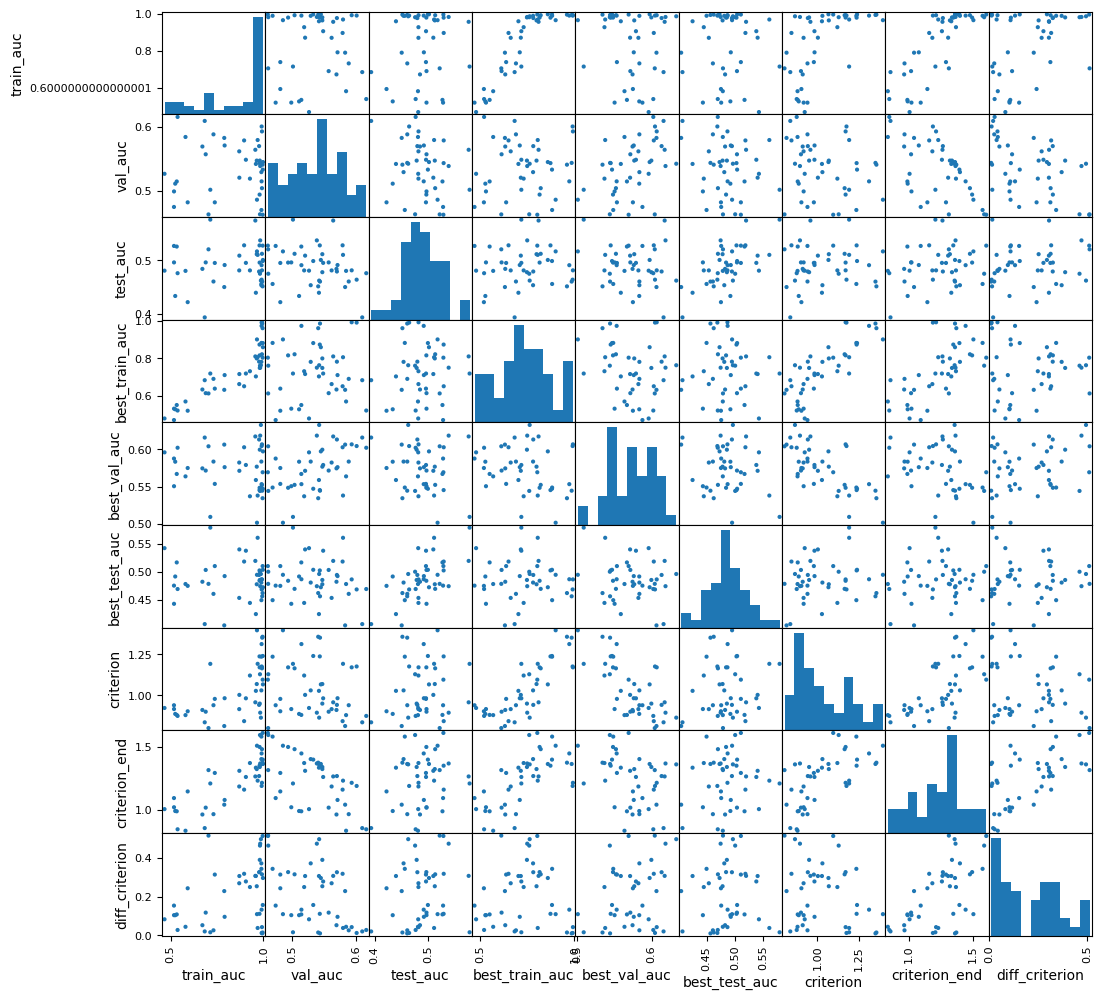

In [8]:
bdd["criterion"] = abs(bdd["best_val_auc"] - bdd["best_train_auc"]) + 2*(1-bdd["best_val_auc"])
bdd["criterion_end"] = abs(bdd["val_auc"] - bdd["train_auc"]) + 2*(1-bdd["val_auc"])
bdd["diff_criterion"] = abs(bdd["criterion"]-bdd["criterion_end"])
bdd["diff_best"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"]))
bdd["diff_end"] = np.log(abs(bdd["val_auc"] - bdd["train_auc"])+0.01)
bdd["criterion2"] = np.log(abs(bdd["best_val_auc"] - bdd["best_train_auc"])) + np.log(0.7-bdd["best_val_auc"])
bdd["diff"] = np.log(abs(bdd["best_train_auc"] - 0.55))
obj = pd.plotting.scatter_matrix(bdd[['train_auc', 'val_auc', 'test_auc', 'best_train_auc', 'best_val_auc', 'best_test_auc', 'criterion', 'criterion_end', 'diff_criterion']],
                                 figsize=(12,12),
                                 alpha=1.0)

In [9]:
# bdd[bdd['best_test_auc']>0.6]['model_path'].iat[0]

Text(0, 0.5, 'best_test_auc')

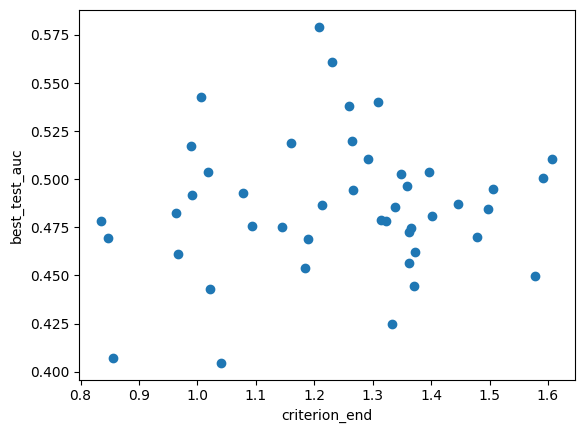

In [10]:
plt.scatter(bdd["criterion_end"], bdd.best_test_auc)
plt.xlabel("criterion_end")
plt.ylabel("best_test_auc")

(0.75, 1.2)

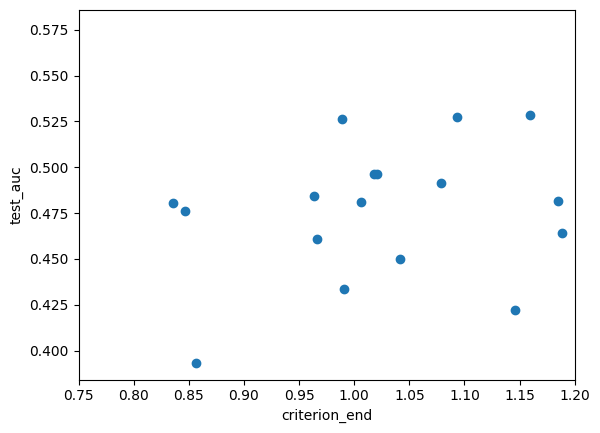

In [11]:
plt.scatter(bdd["criterion_end"], bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,1.2))

In [12]:
quantile = []
test_auc = []
test_auc_cum = []
error_cum = []
error = []
delta=0.1
quantile_x = np.arange(delta,1+delta,delta)
print(quantile_x)
for q in quantile_x:
    one_quantile = bdd['criterion_end'].quantile(q=q)
    quantile.append(one_quantile)
    test_auc_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].mean())
    error_cum.append(bdd[bdd['criterion_end'] < one_quantile]['test_auc'].sem())
    if q==delta:
        test_auc.append(test_auc_cum[-1])
        error.append(error_cum[-1])
    else:
        test_auc.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].mean())
        error.append(bdd[(bdd['criterion_end'] < one_quantile) & (bdd['criterion_end'] >= quantile[-2])]['test_auc'].sem())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


(0.45, 0.6)

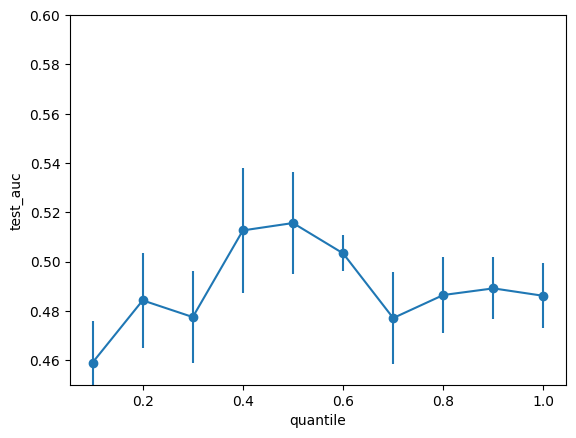

In [13]:
plt.errorbar(quantile_x, test_auc, error, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc")
plt.ylim((0.45,0.6))

(0.45, 0.6)

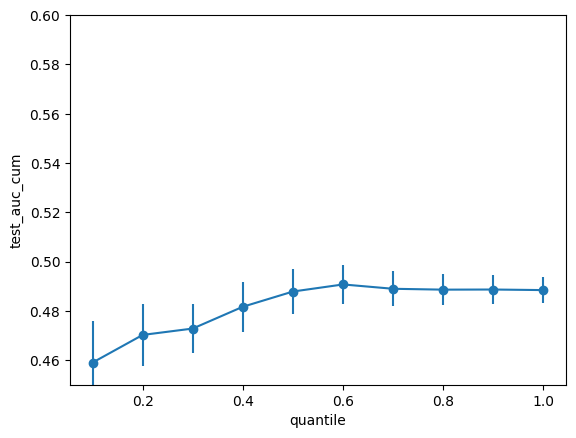

In [14]:
plt.errorbar(quantile_x, test_auc_cum, error_cum, marker='o')
plt.xlabel("quantile")
plt.ylabel("test_auc_cum")
plt.ylim((0.45,0.6))

Text(0, 0.5, 'test_auc')

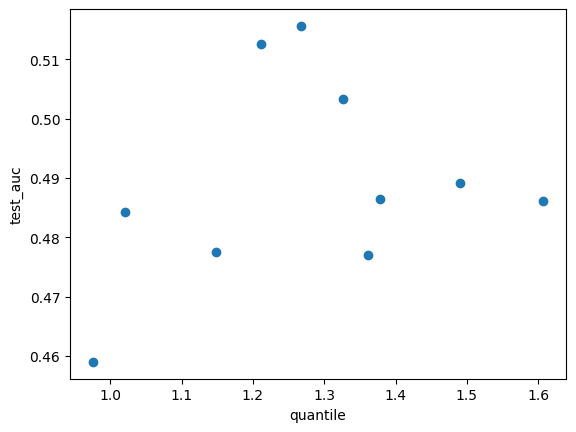

In [15]:
plt.scatter(quantile, test_auc)
plt.xlabel("quantile")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

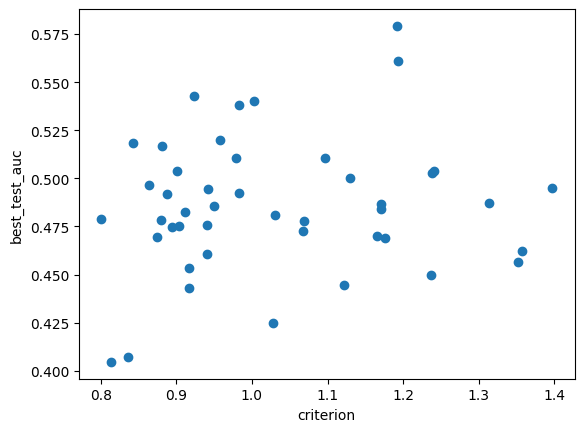

In [16]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

In [17]:
best_quantile = []
best_test_auc = []
for q in quantile_x:
    one_quantile = bdd['criterion'].quantile(q=q)
    best_quantile.append(one_quantile)
    best_test_auc.append(bdd[bdd['criterion'] < one_quantile]['best_test_auc'].mean())

Text(0, 0.5, 'best_test_auc')

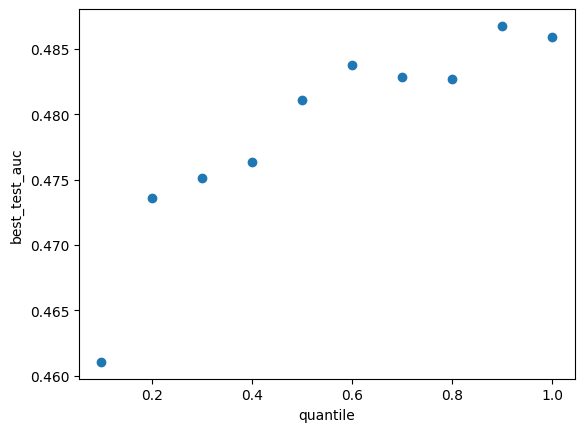

In [18]:
plt.scatter(quantile_x, best_test_auc)
plt.xlabel("quantile")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'val_auc')

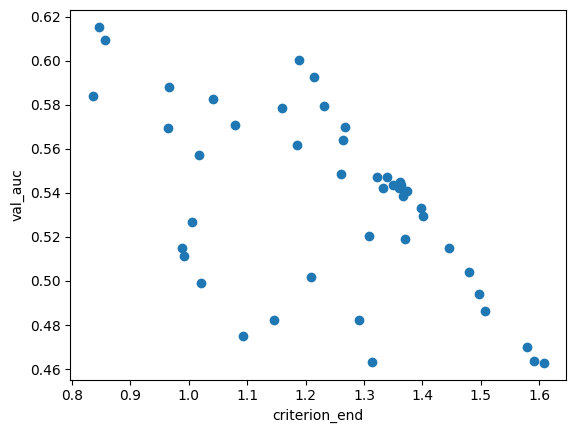

In [19]:
plt.scatter(bdd["criterion_end"], bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

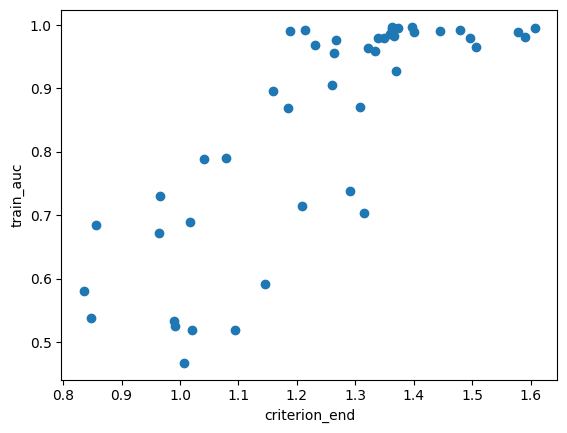

In [20]:
plt.scatter(bdd["criterion_end"], bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [21]:
bdd.sort_values(by=['test_auc'], ascending=False)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
21,/volatile2/jc225751/Runs/61_classifier_regress...,0.713895,0.501800,0.576623,0.719439,0.509002,0.579221,0.177917,0.780583,0.000116,137.854294,1.192434,1.208494,0.016060,-1.558569,-1.504651,-3.214059,-1.775264
12,/volatile2/jc225751/Runs/61_classifier_regress...,0.956477,0.564157,0.574892,0.810398,0.617512,0.519769,0.218298,0.774118,0.003622,101.165779,0.957861,1.264006,0.306145,-1.645659,-0.910507,-4.140765,-1.345545
34,/volatile2/jc225751/Runs/61_classifier_regress...,0.982701,0.538789,0.537662,0.750552,0.618658,0.474603,0.222882,0.949117,0.000550,92.433578,0.894578,1.366334,0.471756,-2.025755,-0.789853,-4.534847,-1.606681
22,/volatile2/jc225751/Runs/61_classifier_regress...,0.896068,0.578723,0.528427,0.651841,0.602946,0.518615,0.138224,0.861968,0.000191,131.898026,0.843003,1.159898,0.316895,-3.018078,-1.116741,-5.350565,-2.284341
35,/volatile2/jc225751/Runs/61_classifier_regress...,0.978967,0.543372,0.528283,0.873338,0.545172,0.502742,0.154163,0.754730,0.002968,77.382408,1.237822,1.348853,0.111030,-1.114235,-0.808343,-2.979675,-1.129057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,/volatile2/jc225751/Runs/61_classifier_regress...,0.789072,0.582651,0.450216,0.632844,0.606547,0.404618,0.263831,0.717145,0.000309,134.299225,0.813204,1.041118,0.227914,-3.638284,-1.530531,-6.008577,-2.490795
9,/volatile2/jc225751/Runs/61_classifier_regress...,0.959392,0.542062,0.439538,0.704055,0.558756,0.424820,0.094483,0.965489,0.000239,117.266624,1.027786,1.333205,0.305419,-1.928964,-0.850200,-3.886231,-1.870447
11,/volatile2/jc225751/Runs/61_classifier_regress...,0.524954,0.511293,0.433478,0.529438,0.583470,0.491919,0.248504,0.744899,0.004731,138.745041,0.887092,0.991075,0.103983,-2.918189,-3.743934,-5.067793,-3.884324
28,/volatile2/jc225751/Runs/61_classifier_regress...,0.592086,0.482160,0.421934,0.521814,0.574959,0.475180,0.098434,0.945097,0.007610,138.675018,0.903227,1.145605,0.242378,-2.934728,-2.120886,-5.013842,-3.568927


Text(0, 0.5, 'best_test_auc')

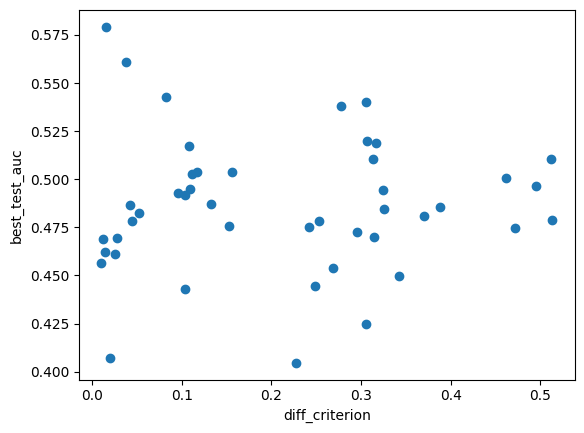

In [22]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

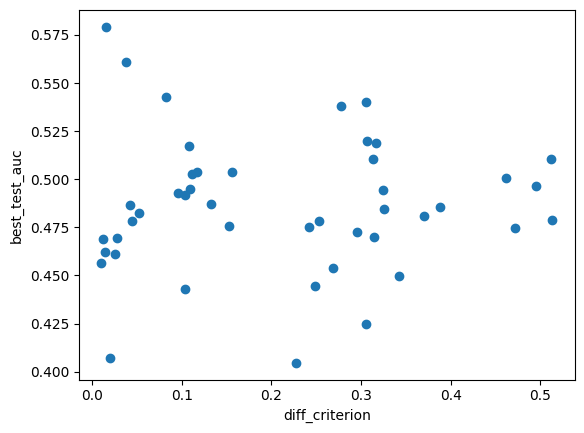

In [23]:
plt.scatter(bdd["diff_criterion"], bdd.best_test_auc)
plt.xlabel("diff_criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

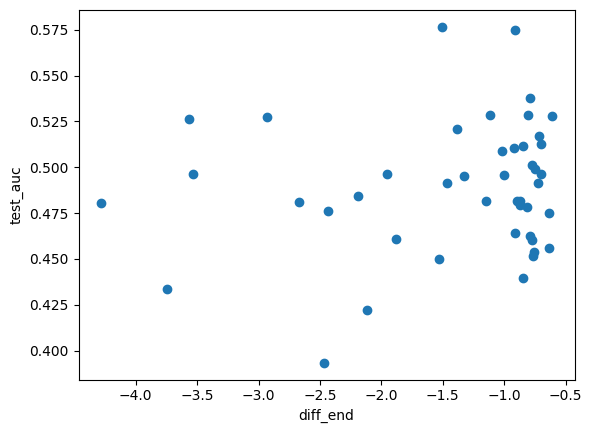

In [24]:
plt.scatter(bdd["diff_end"], bdd.test_auc)
plt.xlabel("diff_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

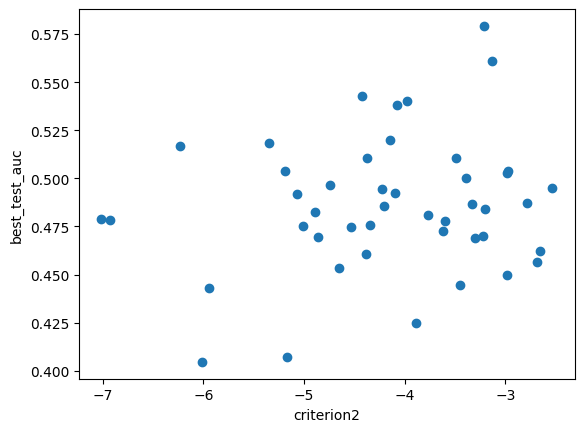

In [25]:
plt.scatter(bdd["criterion2"], bdd.best_test_auc)
plt.xlabel("criterion2")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

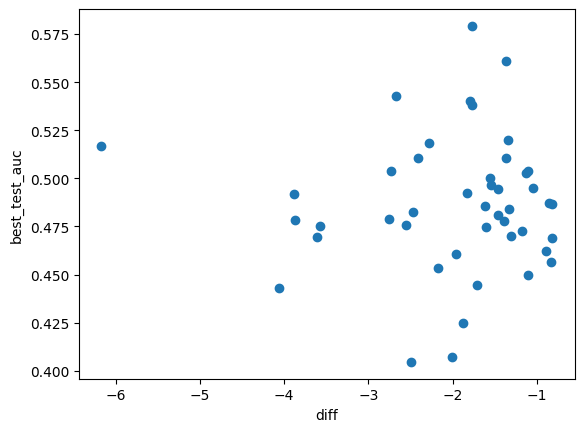

In [26]:
plt.scatter(bdd["diff"], bdd.best_test_auc)
plt.xlabel("diff")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_test_auc')

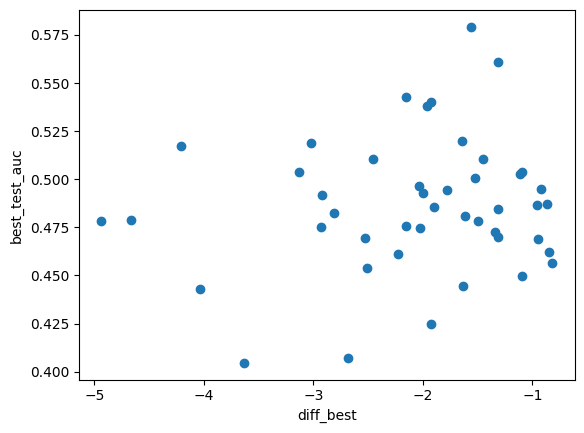

In [27]:
plt.scatter(bdd["diff_best"], bdd.best_test_auc)
plt.xlabel("diff_best")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

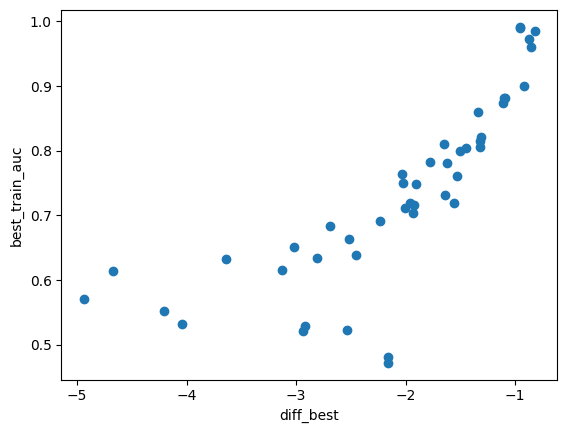

In [28]:
plt.scatter(bdd["diff_best"], bdd.best_train_auc)
plt.xlabel("diff_best")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

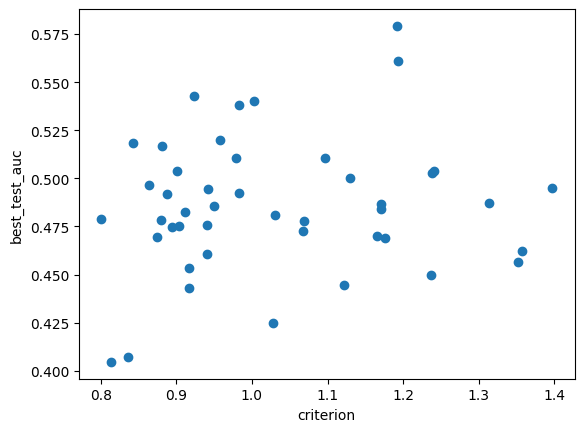

In [29]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

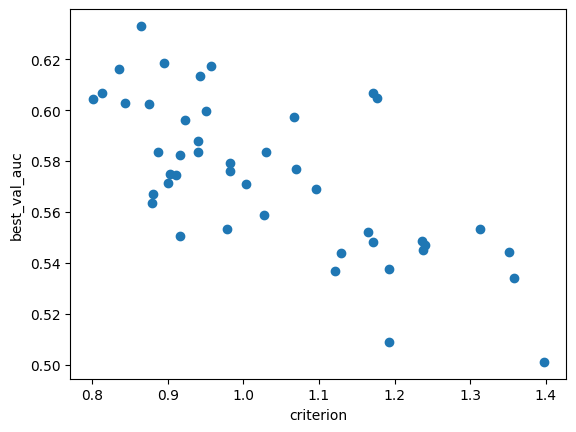

In [30]:
plt.scatter(bdd.criterion, bdd.best_val_auc)
plt.xlabel("criterion")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'best_train_auc')

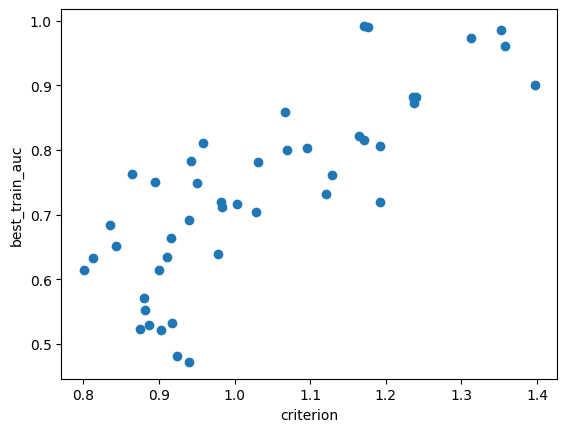

In [31]:
plt.scatter(bdd.criterion, bdd.best_train_auc)
plt.xlabel("criterion")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_test_auc')

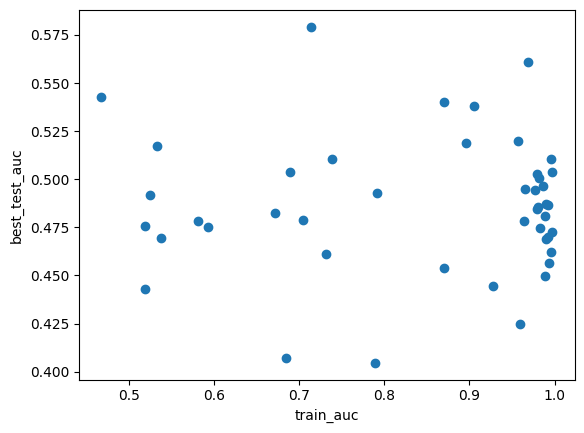

In [32]:
plt.scatter(bdd.train_auc, bdd.best_test_auc)
plt.xlabel("train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

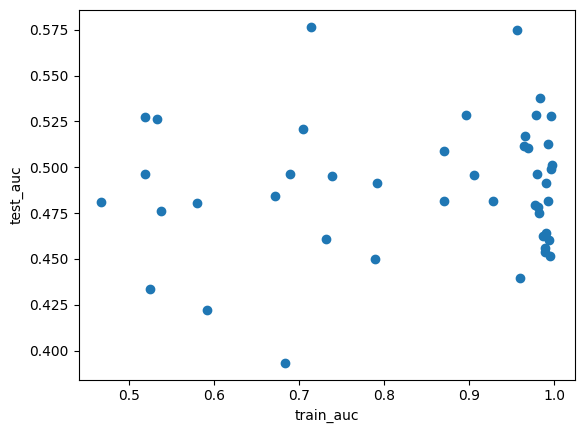

In [33]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

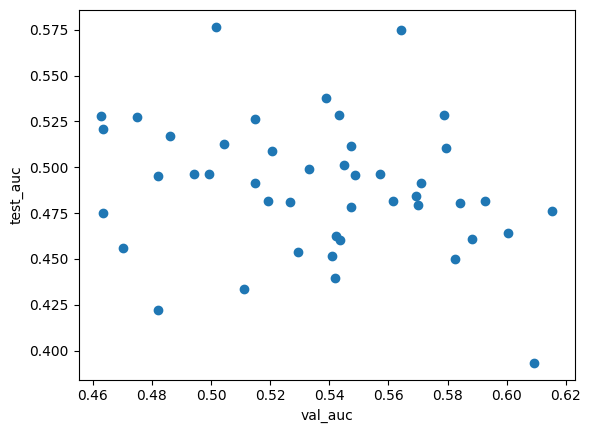

In [34]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_test_auc')

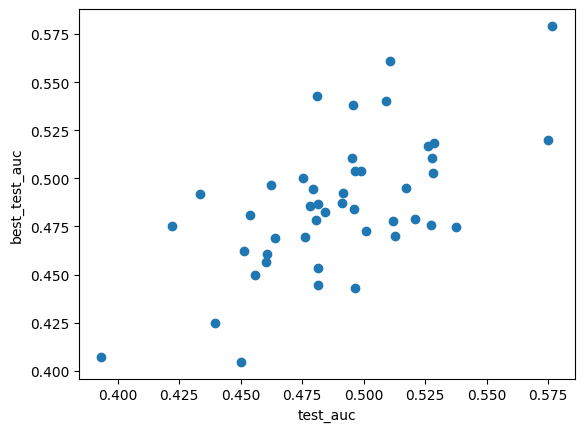

In [35]:
plt.scatter(bdd.test_auc, bdd.best_test_auc)
plt.xlabel("test_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_train_auc')

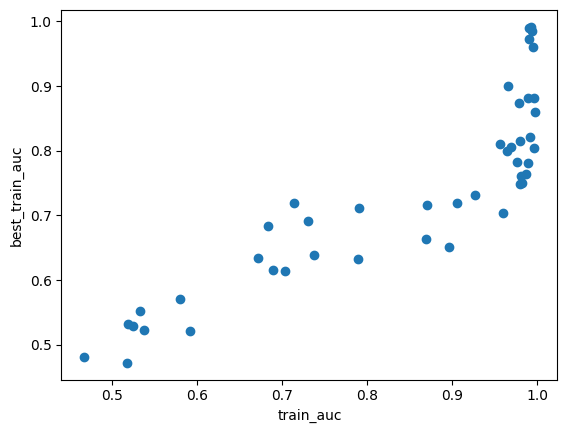

In [36]:
plt.scatter(bdd.train_auc, bdd.best_train_auc)
plt.xlabel("train_auc")
plt.ylabel("best_train_auc")

Text(0, 0.5, 'best_val_auc')

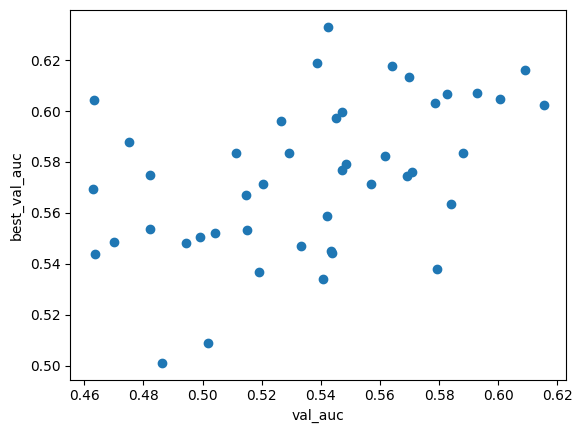

In [37]:
plt.scatter(bdd.val_auc, bdd.best_val_auc)
plt.xlabel("val_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'test_auc')

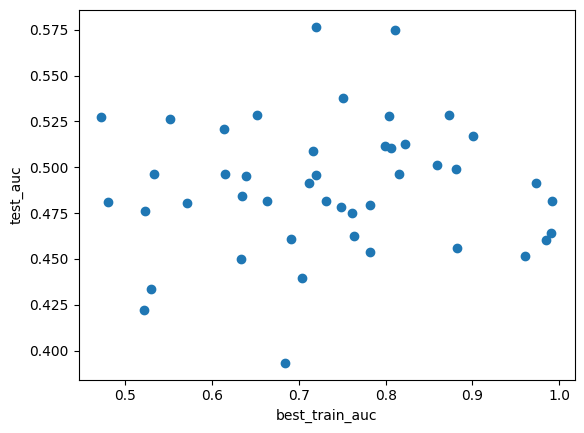

In [38]:
plt.scatter(bdd.best_train_auc, bdd.test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'best_val_auc')

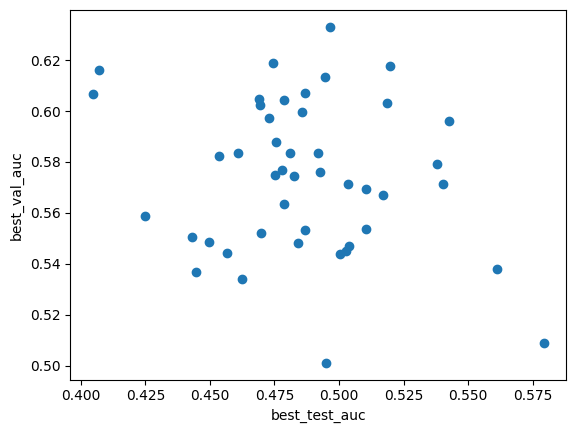

In [39]:
plt.scatter(bdd.best_test_auc, bdd.best_val_auc)
plt.xlabel("best_test_auc")
plt.ylabel("best_val_auc")

(0.4, 0.65)

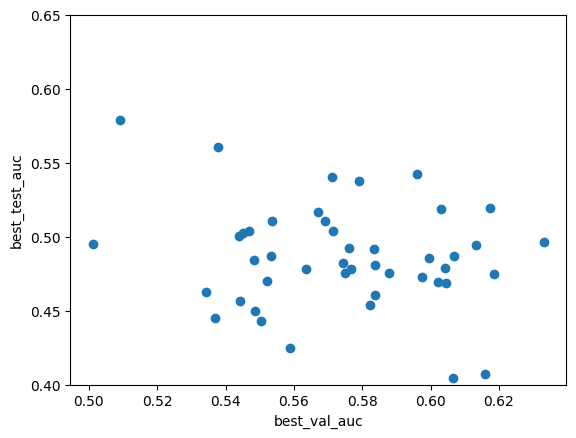

In [40]:
plt.scatter(bdd.best_val_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

(0.4, 0.65)

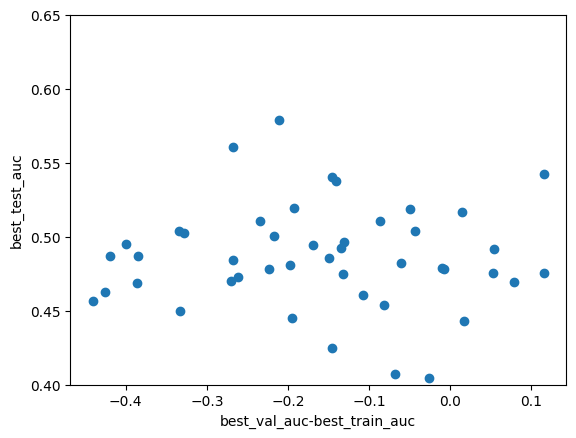

In [41]:
plt.scatter(bdd.best_val_auc-bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_val_auc-best_train_auc")
plt.ylabel("best_test_auc")
plt.ylim((0.4,0.65))

Text(0, 0.5, 'best_test_auc')

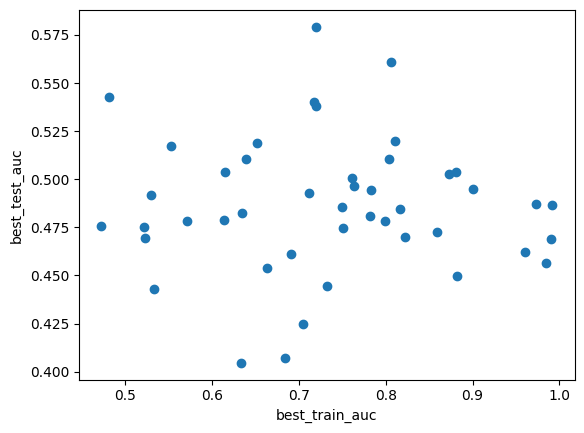

In [42]:
plt.scatter(bdd.best_train_auc, bdd.best_test_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'best_val_auc')

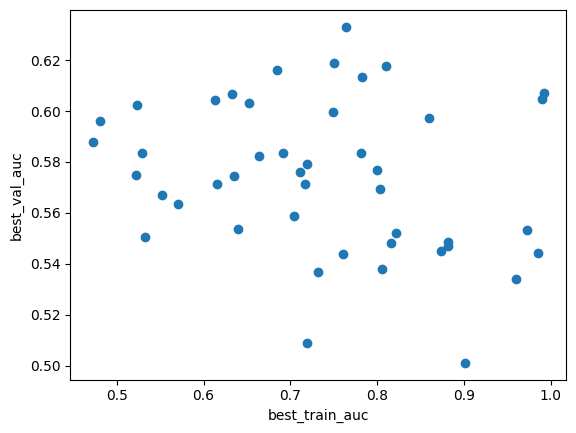

In [43]:
plt.scatter(bdd.best_train_auc, bdd.best_val_auc)
plt.xlabel("best_train_auc")
plt.ylabel("best_val_auc")

Text(0, 0.5, 'criterion')

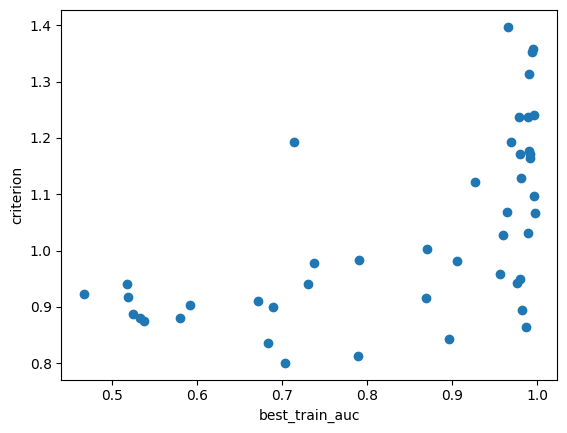

In [44]:
plt.scatter(bdd.train_auc, bdd.criterion)
plt.xlabel("best_train_auc")
plt.ylabel("criterion")

(0.7, 0.8)

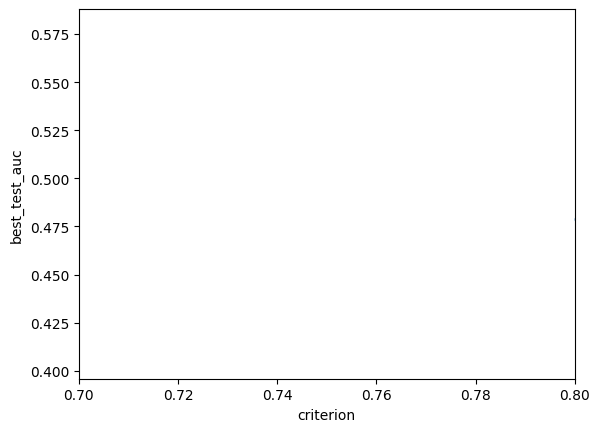

In [45]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")
plt.xlim((0.7,0.8))

(0.75, 0.9)

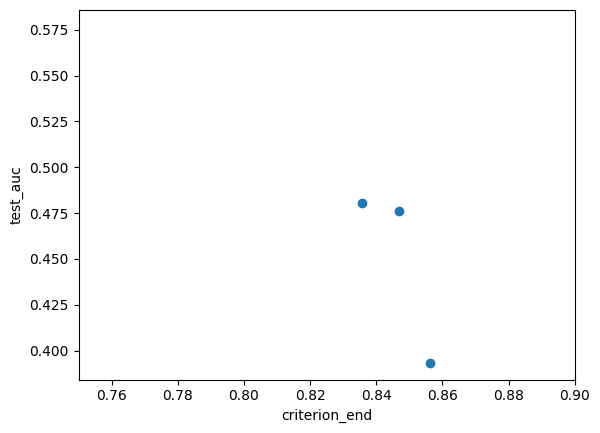

In [46]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")
plt.xlim((0.75,0.9))

Text(0, 0.5, 'best_test_auc')

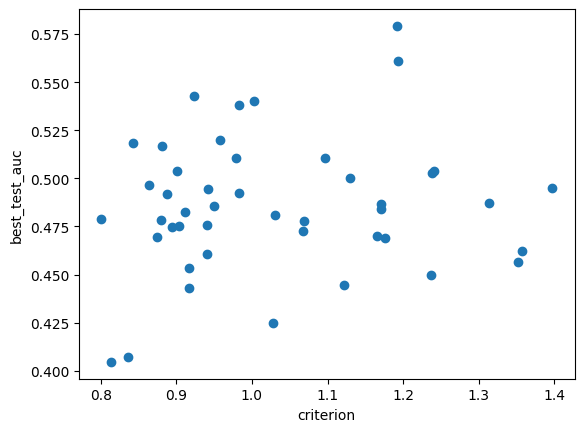

In [47]:
plt.scatter(bdd.criterion, bdd.best_test_auc)
plt.xlabel("criterion")
plt.ylabel("best_test_auc")

Text(0, 0.5, 'test_auc')

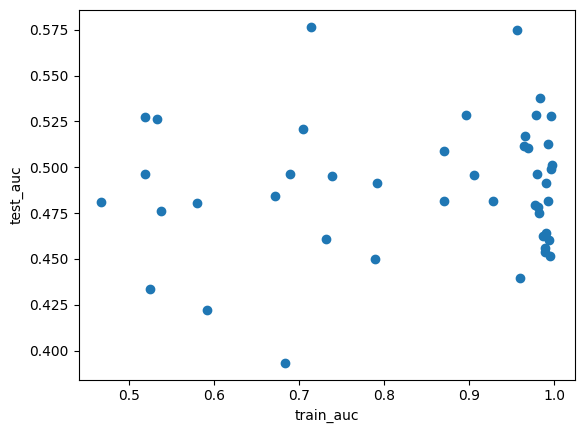

In [48]:
plt.scatter(bdd.train_auc, bdd.test_auc)
plt.xlabel("train_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

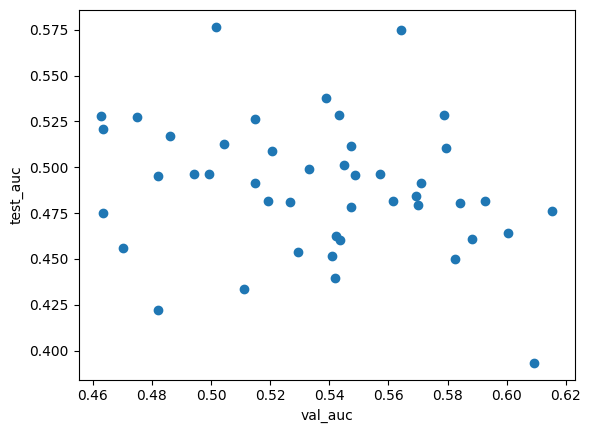

In [49]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")

Text(0, 0.5, 'test_auc')

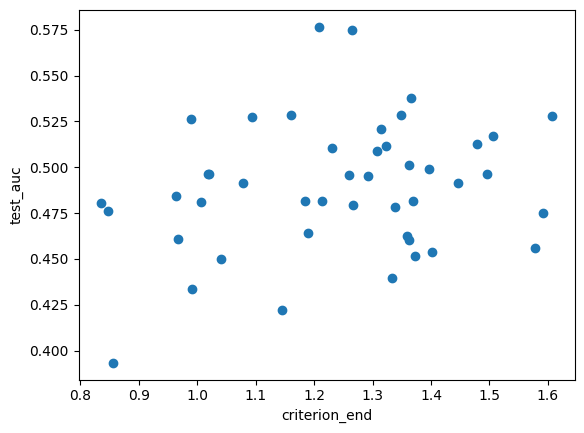

In [50]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

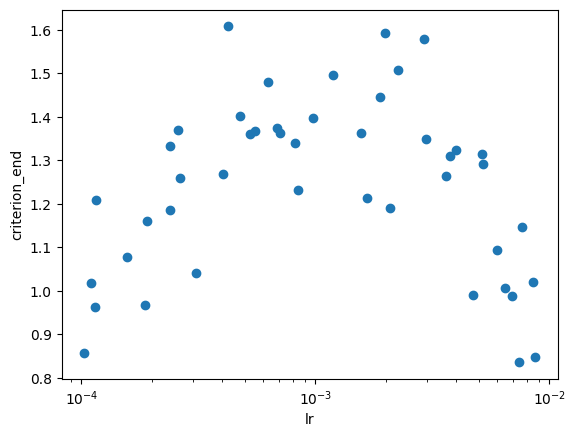

In [51]:
plt.scatter(bdd.lr, bdd.criterion_end)
plt.xlabel("lr")
plt.ylabel("criterion_end")
plt.xscale("log")

Text(0, 0.5, 'criterion_end')

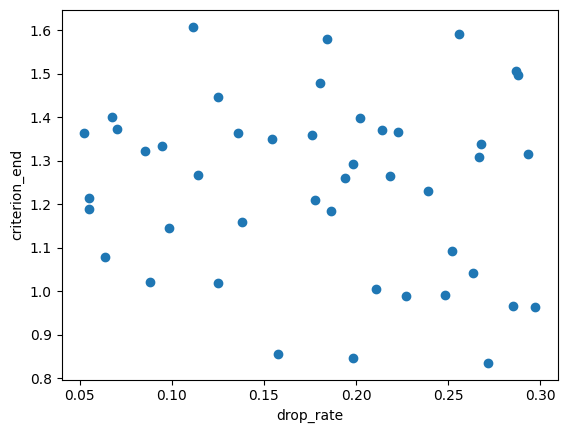

In [52]:
plt.scatter(bdd.drop_rate, bdd.criterion_end)
plt.xlabel("drop_rate")
plt.ylabel("criterion_end")

/tmp/ipykernel_2133683/1393031548.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


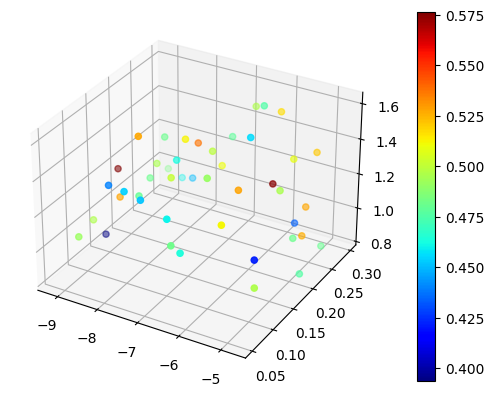

In [53]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
z = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
scat = ax.scatter(np.log(bdd.lr), bdd.drop_rate, z, c=scalarMap.to_rgba(cs))
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_2133683/3606356904.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


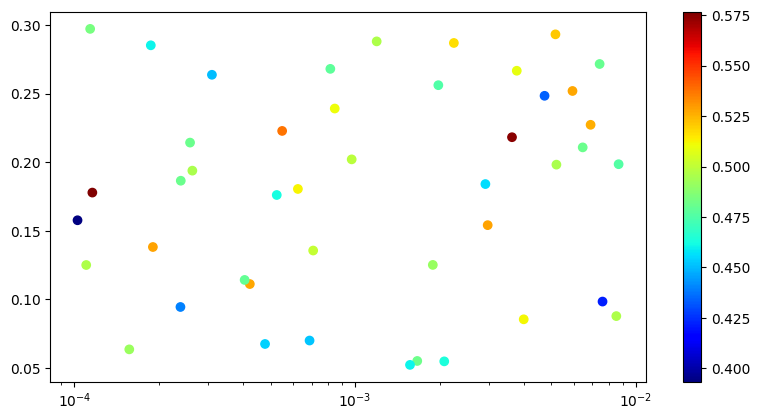

In [54]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet'
cm = plt.get_cmap(colorsMap)
cs = bdd.test_auc
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

/tmp/ipykernel_2133683/295477420.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scalarMap)


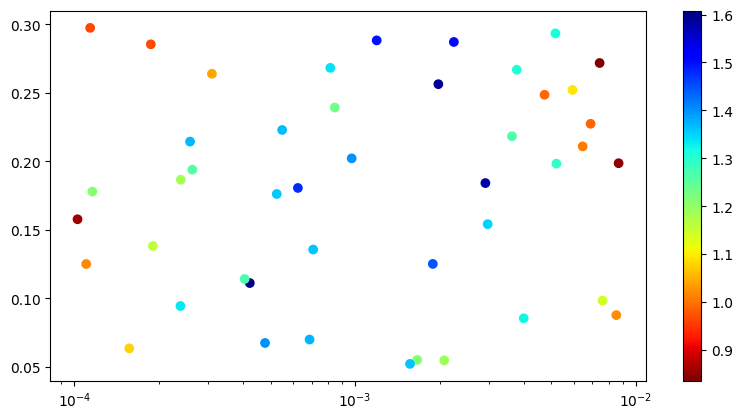

In [55]:
import matplotlib.cm as cmx
import matplotlib
colorsMap = 'jet_r'
cm = plt.get_cmap(colorsMap)
cs = bdd.criterion_end
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
scat = ax.scatter(bdd.lr, bdd.drop_rate, c=scalarMap.to_rgba(cs))
ax.set_xscale("log")
scalarMap.set_array(cs)
fig.colorbar(scalarMap)

Text(0, 0.5, 'criterion_end')

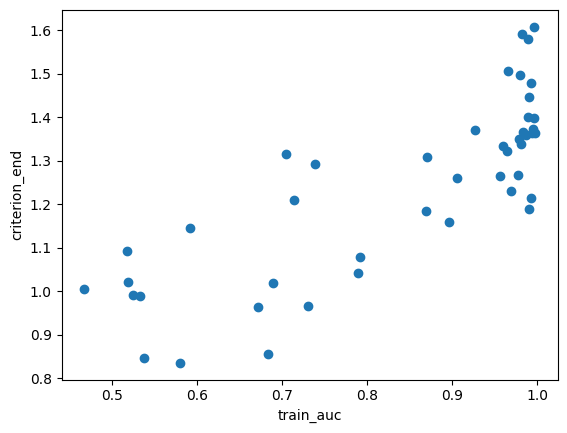

In [56]:
plt.scatter(bdd.train_auc, bdd.criterion_end)
plt.xlabel("train_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'val_auc')

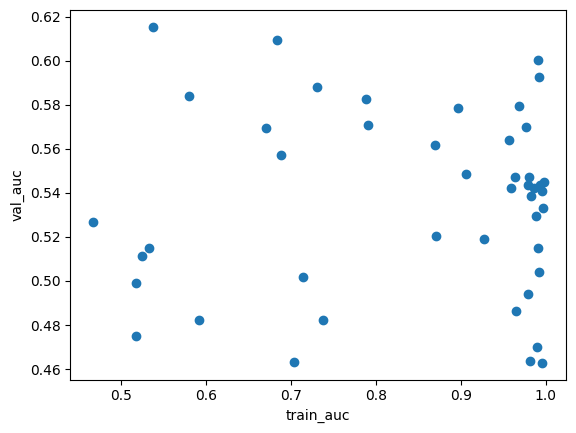

In [57]:
plt.scatter(bdd.train_auc, bdd.val_auc)
plt.xlabel("train_auc")
plt.ylabel("val_auc")

Text(0, 0.5, 'test_auc')

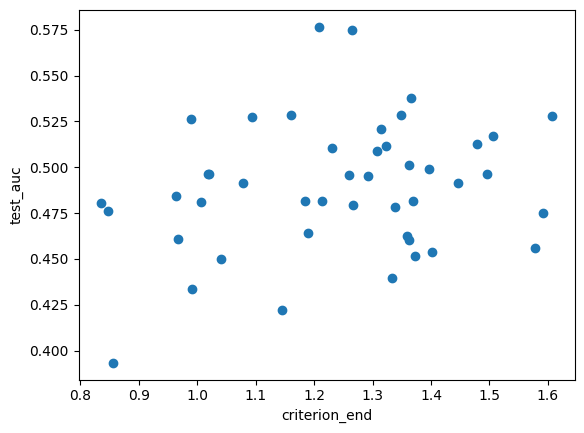

In [58]:
plt.scatter(bdd.criterion_end, bdd.test_auc)
plt.xlabel("criterion_end")
plt.ylabel("test_auc")

Text(0, 0.5, 'val_auc')

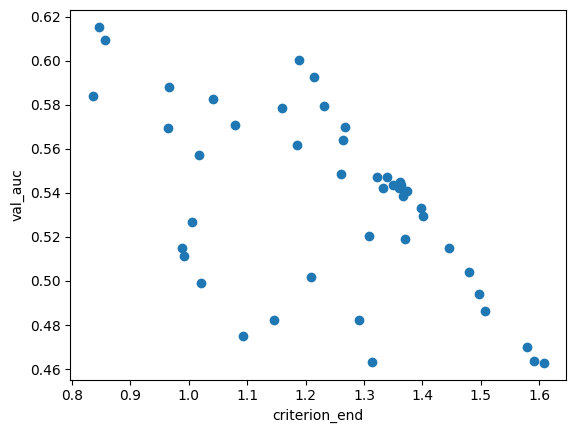

In [59]:
plt.scatter(bdd.criterion_end, bdd.val_auc)
plt.xlabel("criterion_end")
plt.ylabel("val_auc")

Text(0, 0.5, 'train_auc')

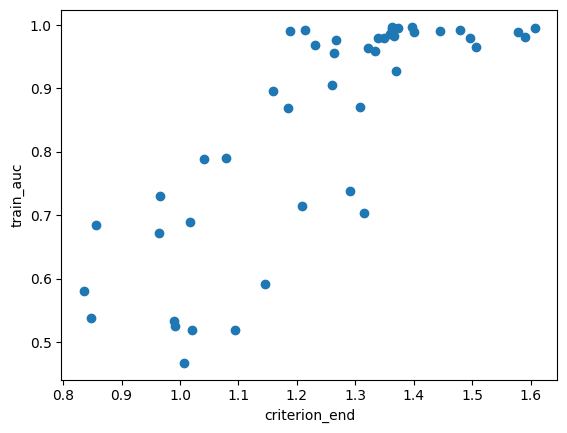

In [60]:
plt.scatter(bdd.criterion_end, bdd.train_auc)
plt.xlabel("criterion_end")
plt.ylabel("train_auc")

In [61]:
bdd.sort_values(by=['criterion_end'], ascending=True)

,model_path,train_auc,val_auc,test_auc,best_train_auc,best_val_auc,best_test_auc,drop_rate,gamma,lr,train_loss,criterion,criterion_end,diff_criterion,diff_best,diff_end,criterion2,diff
36,/volatile2/jc225751/Runs/61_classifier_regress...,0.580285,0.584124,0.480519,0.570843,0.563666,0.478499,0.271698,0.993211,0.007431,138.732773,0.879844,0.835591,0.044254,-4.936938,-4.280225,-6.929586,-3.870753
43,/volatile2/jc225751/Runs/61_classifier_regress...,0.537709,0.615385,0.476190,0.522873,0.602291,0.469553,0.198613,0.799227,0.008683,138.597504,0.874836,0.846907,0.027929,-2.533027,-2.434107,-4.858792,-3.607228
8,/volatile2/jc225751/Runs/61_classifier_regress...,0.683833,0.609165,0.393362,0.684021,0.616039,0.406926,0.157731,0.857919,0.000103,137.464371,0.835903,0.856337,0.020434,-2.688514,-2.469017,-5.165920,-2.009758
29,/volatile2/jc225751/Runs/61_classifier_regress...,0.671289,0.569231,0.484271,0.634557,0.574468,0.482540,0.297308,0.845661,0.000114,138.137817,0.911152,0.963597,0.052444,-2.811934,-2.188738,-4.887130,-2.470333
25,/volatile2/jc225751/Runs/61_classifier_regress...,0.730947,0.588216,0.460606,0.691075,0.583633,0.460895,0.285329,0.895464,0.000187,136.938248,0.940174,0.966299,0.026124,-2.230811,-1.879080,-4.381821,-1.958466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,/volatile2/jc225751/Runs/61_classifier_regress...,0.979471,0.494272,0.496104,0.815904,0.548282,0.484271,0.288195,0.776142,0.001194,92.197296,1.171059,1.496656,0.325596,-1.318179,-0.702796,-3.203907,-1.324621
7,/volatile2/jc225751/Runs/61_classifier_regress...,0.965289,0.486252,0.517027,0.900651,0.501146,0.494949,0.287035,0.947800,0.002249,96.803993,1.397214,1.506532,0.109319,-0.917529,-0.715318,-2.532712,-1.047965
30,/volatile2/jc225751/Runs/61_classifier_regress...,0.989213,0.470213,0.455988,0.882044,0.548609,0.449639,0.184125,0.918014,0.002912,81.369751,1.236218,1.578575,0.342357,-1.098307,-0.636766,-2.986195,-1.102488
3,/volatile2/jc225751/Runs/61_classifier_regress...,0.981454,0.463502,0.475180,0.761189,0.544026,0.500433,0.256247,0.987817,0.001980,94.171051,1.129110,1.590946,0.461836,-1.527110,-0.638751,-3.385177,-1.555003


Text(0, 0.5, 'criterion_end')

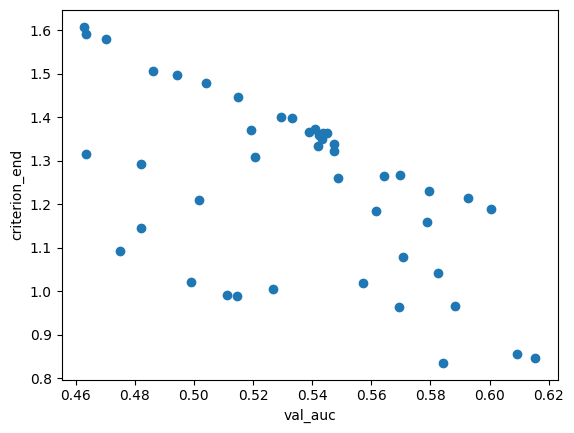

In [62]:
plt.scatter(bdd.val_auc, bdd.criterion_end)
plt.xlabel("val_auc")
plt.ylabel("criterion_end")

Text(0, 0.5, 'test_auc')

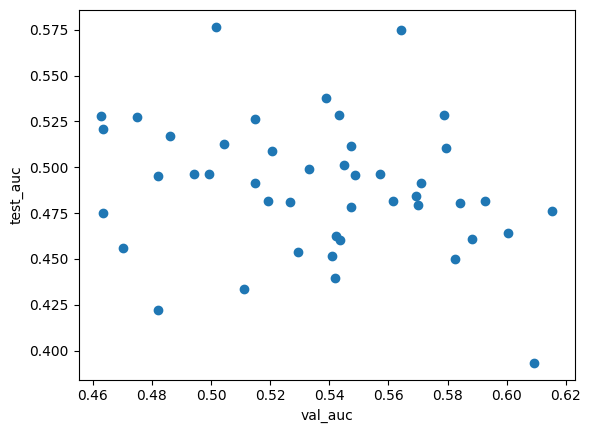

In [63]:
plt.scatter(bdd.val_auc, bdd.test_auc)
plt.xlabel("val_auc")
plt.ylabel("test_auc")